In [42]:
#Neccessary Librabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [43]:
df=pd.read_csv("/content/realest.csv")

In [44]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [45]:
df.fillna(df.median(), inplace=True)
missing_values = df.isnull().sum()
missing_values

,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


In [46]:
# 2. Classification Models to predict the prices of the house(binary classification based on median price)

# Define the target variable(Price)
median = df['Price'].median()

# Create a binary target variable for classification
df['Median_Price'] = (df['Price'] >= median).astype(int)

# Separate the features and the new binary target variable
X = df.drop(['Price', 'Median_Price'], axis=1)
y = df['Median_Price']

In [47]:
# Split data for regression into training(80%) and testing(20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Logistic Regression
# Initialize the Logistic Regression model
Log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
Log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_Logr = Log_reg.predict(X_test)


In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_Logr)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_Logr))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Logr))


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.93      0.74      0.82        19

    accuracy                           0.81        32
   macro avg       0.82      0.83      0.81        32
weighted avg       0.84      0.81      0.81        32

Confusion Matrix:
 [[12  1]
 [ 5 14]]


In [50]:
# Decision Tree Classifier
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred_dectree = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_dectree})
predictions

,Actual,Predicted
126,0,0
45,0,0
133,1,1
138,1,1
111,1,1
29,1,1
95,1,1
97,0,0
94,1,1
139,1,1


In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dectree)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_dectree))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dectree))

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.84      0.91        19

    accuracy                           0.91        32
   macro avg       0.91      0.92      0.91        32
weighted avg       0.92      0.91      0.91        32

Confusion Matrix:
 [[13  0]
 [ 3 16]]


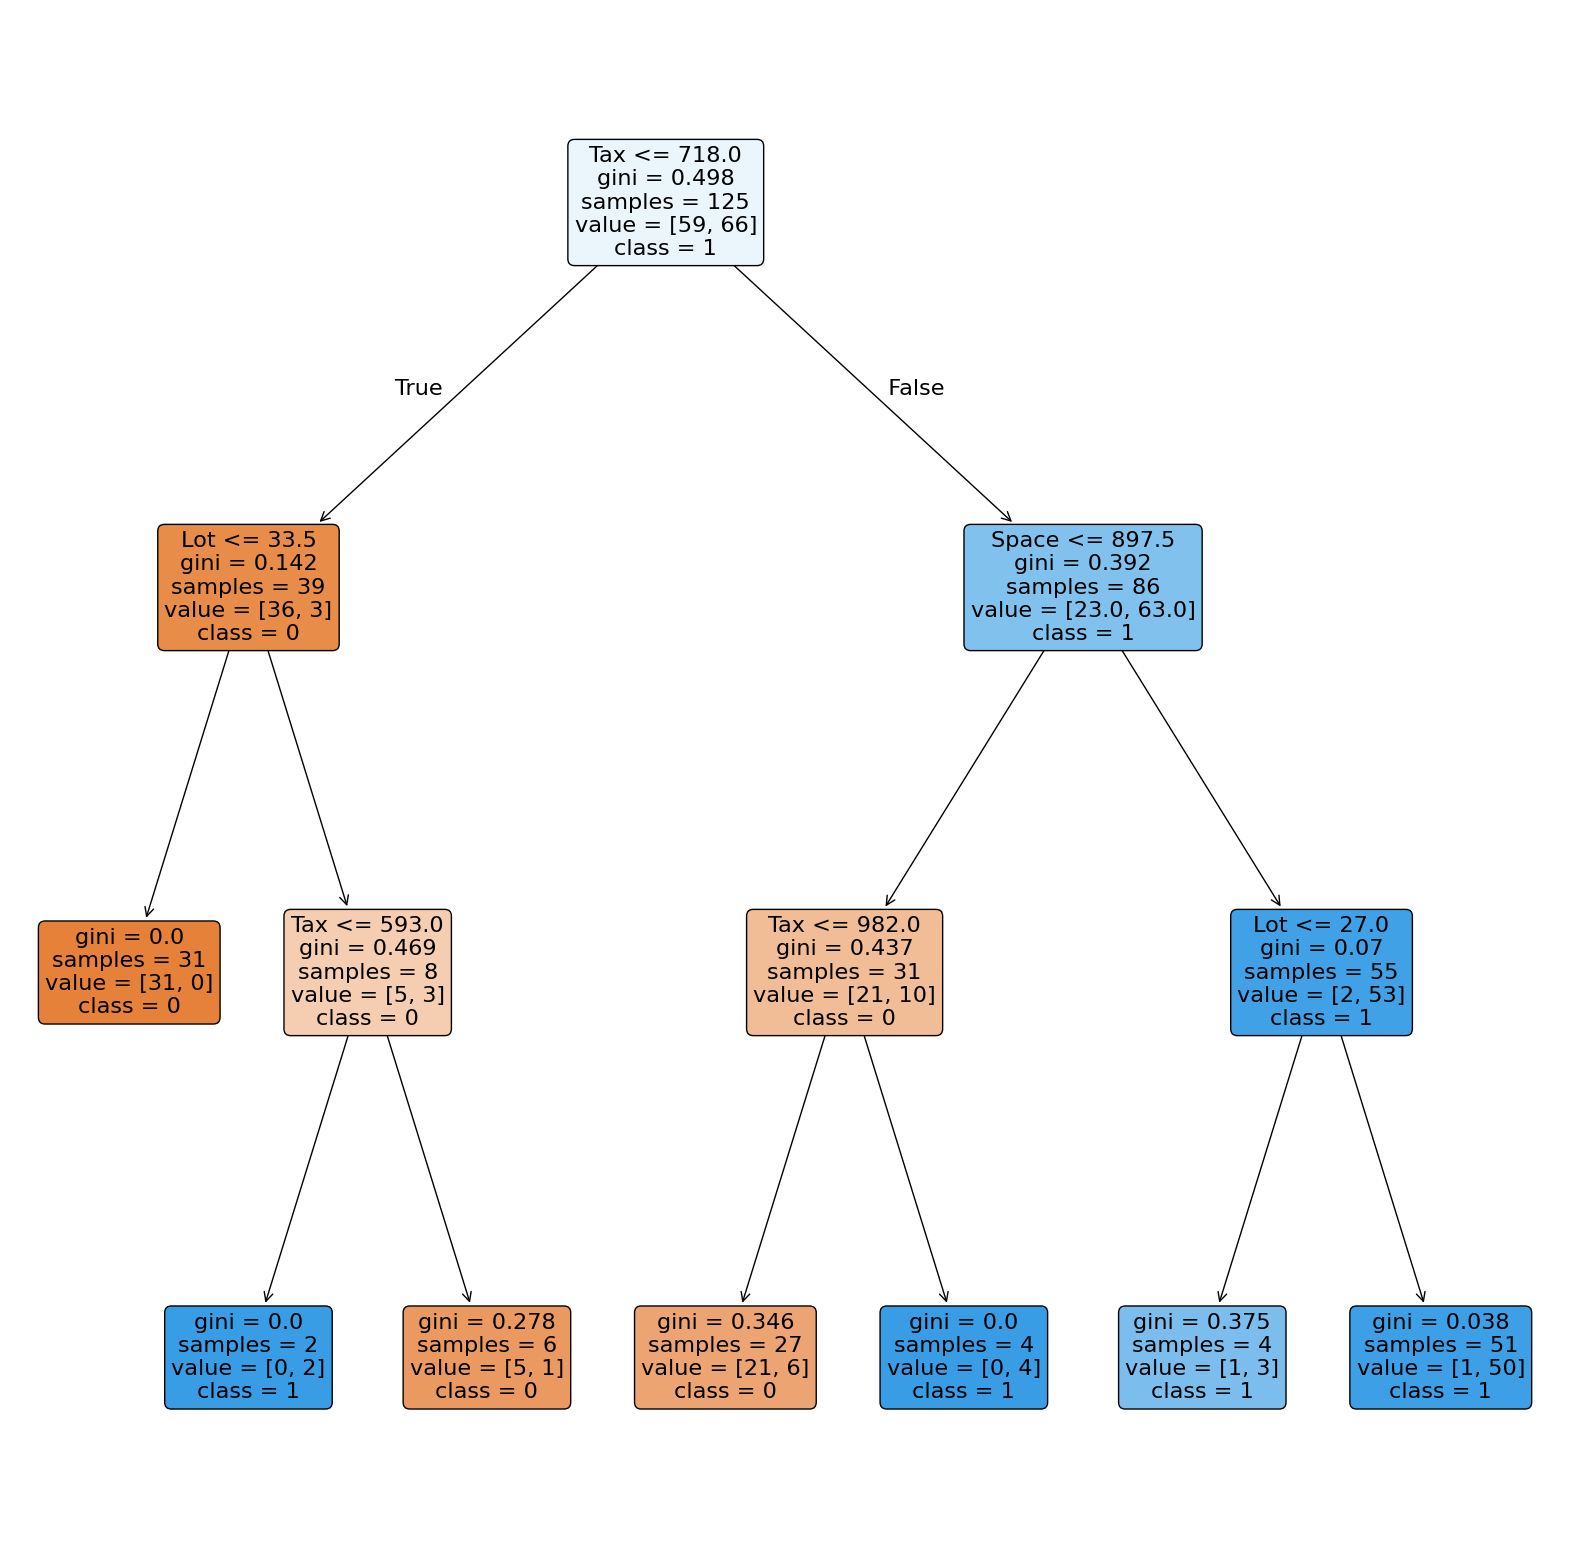

In [52]:
#plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns.tolist(),
               class_names=['0', '1'],
               filled=True,
               rounded=True)
plt.show()

In [53]:
# Random Forest Model
# Initialize the DecisionTreeClassifier
rf = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)


# Predict on the testing set
y_pred_rf = rf.predict(X_test)

# Get feature importances from the model
feature_importance = rf.feature_importances_
features = X_train.columns
important_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort feature importances
important_df = important_df.sort_values(by='Importance', ascending=False)
important_df

,Feature,Importance
4,Tax,0.335664
1,Space,0.220392
3,Lot,0.131380
6,Garage,0.090172
5,Bathroom,0.068815
0,Bedroom,0.067440
2,Room,0.066692
7,Condition,0.019446


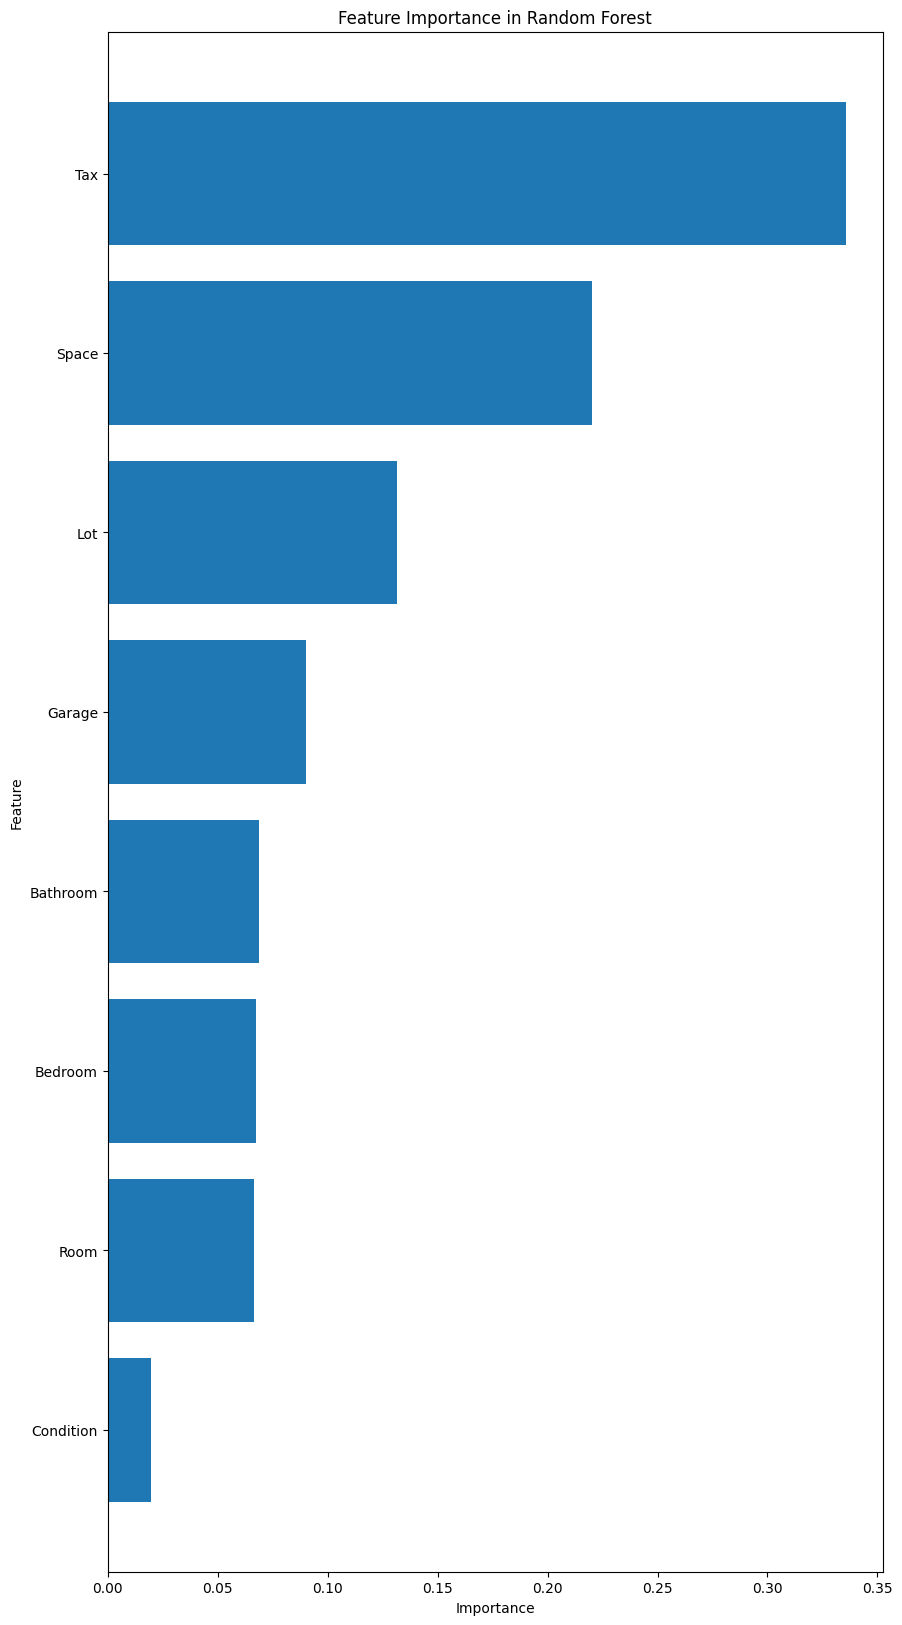

In [54]:
# Plot the important features
plt.figure(figsize=(10, 20))
plt.barh(important_df['Feature'], important_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.95      0.97        19

    accuracy                           0.97        32
   macro avg       0.96      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Confusion Matrix:
 [[13  0]
 [ 1 18]]


In [56]:
# Gradient Boosting Classifier
# Initialize the Gradient Boosting Classifier
grad_boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,
                                 max_depth=5,random_state=42)

# Fit the model on the training data
grad_boost.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = grad_boost.predict(X_test)

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.84      0.91        19

    accuracy                           0.91        32
   macro avg       0.91      0.92      0.91        32
weighted avg       0.92      0.91      0.91        32

Confusion Matrix:
 [[13  0]
 [ 3 16]]


In [58]:
# KNN
# Scale the features for better performance of KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
#Apply PCA to the scales data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Pincipal Component 1', 'Pincipal Component 2'])

pca_df.head()

,Pincipal Component 1,Pincipal Component 2
0,-1.048343,-0.578994
1,-1.063802,1.375069
2,-0.535770,0.175726
3,-0.207503,0.859521
4,1.082987,0.566218


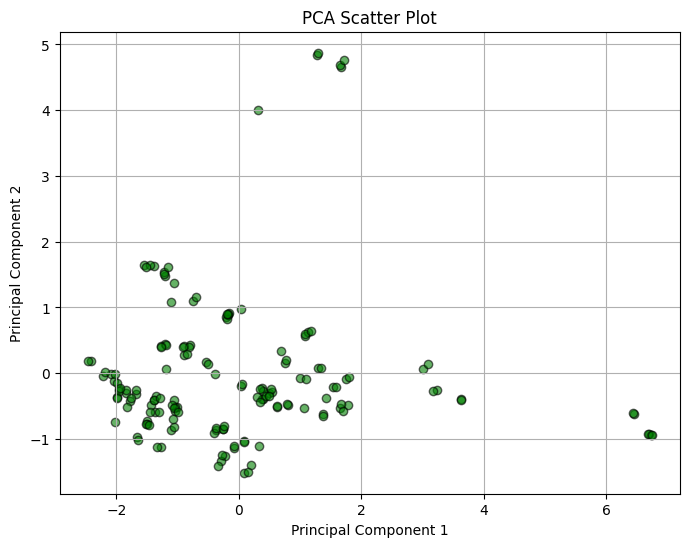

In [60]:
# Plot the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Pincipal Component 1'], pca_df['Pincipal Component 2'], alpha=0.6, c='green', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [62]:
# Test different values of k and calculate the average accuracy
k_values = range(1, 30)
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy)]
print(f"Best k value: {best_k}")

Best k value: 1


In [63]:
#set k value= 1
k = 1

#Apply define model
knn_val = KNeighborsClassifier(n_neighbors=k)

#apply to the trainig data
knn_val.fit(X_train, y_train)

#make predictions using the test data
y_pred_knn = knn_val.predict(X_test)

In [64]:
# Calculate accuracy using the accuracy_score function from sklearn.metrics
accuracy_sc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_sc:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
 [[13  0]
 [ 0 19]]


In [65]:
#set k value= 1
k = 5

#Apply define model
knn_val = KNeighborsClassifier(n_neighbors=k)

#apply to the trainig data
knn_val.fit(X_train, y_train)

#make predictions using the test data
y_pred_knn = knn_val.predict(X_test)


In [66]:
# Calculate accuracy using the accuracy_score function from sklearn.metrics
accuracy_sc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_sc:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.93      0.68      0.79        19

    accuracy                           0.78        32
   macro avg       0.80      0.80      0.78        32
weighted avg       0.82      0.78      0.78        32

Confusion Matrix:
 [[12  1]
 [ 6 13]]


# Conclusion:
The accuracy's are: <br>
Logistic Regression: 0.81 <br>
Decision Tree Classifier: 0.91 <br>
Random Forest Model: 0.97 <br>
Gradient Boosting Classifier: 0.91 <br>
KNN: 1.0 <br>
KNN WITH CHANGED K VAL: 0.78 <br>


In Classification model, Random Forest Model is the best model with accuracy of 0.97.